# Results Visualization #
After running "python stable_diffusion_analysis/experiment.py --num_samplles 3", there will be some result data about similarity, plots, cooccurrence and guidance.
Here, we try to see what results we get

All plots are saved under output_dir specified when the experiment.py is called (default is "output_data").

Other json/csv files are saved under the root directory

The following is dataset.py used in this run

```python
DATASETS = {
	"GCC": "gcc.json",
	"COCO": "coco.json",
	"TextCaps": "textcaps.json",
	"Flickr30k": "flickr30k.json",
	"Profession": "profession.json"
}
```

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import json
import pandas as pd


## Similarity Matrix ##
This will show the similarity matrix based on certain metrics for each provided dataset.
This is one example on Proffesion dataset for all models.

It has a format of "{DatasetName}_similarity_matrix.csv"

In [3]:
df = pd.read_csv("GCC_similarity_matrix.csv")
display(df)

,model,target,Prompt,Denoising,SSIM,Diff. Pix,ResNet,CLIP,DINO,Split-Product
0,SD1.4,neutral-feminine,0.910400,0.773193,0.483933,0.106279,0.996077,0.786863,0.601939,0.999660
1,SD1.4,neutral-masculine,0.927246,0.861572,0.570067,0.209060,0.996491,0.873345,0.750778,0.999553
2,SD2.0,neutral-feminine,0.980469,0.776611,0.533844,0.184439,0.995933,0.806261,0.626788,0.999846
3,SD2.0,neutral-masculine,0.979004,0.731445,0.588841,0.214924,0.996098,0.905603,0.762010,0.999764
4,SD2.1,neutral-feminine,0.980469,0.781250,0.516521,0.151969,0.995930,0.844947,0.702945,0.998853
5,SD2.1,neutral-masculine,0.979004,0.761475,0.596123,0.324817,0.996057,0.894627,0.757239,0.999543


## Cooccurrence Similarity and Bias Score Plot ##

cooccurrence similarity and bias score plot is saved as "cooccurrence_similarity_{DATASET_NAME}.csv" and "stable_diffusion_analysis/output_data/{MODEL_NAME}_{DATASET_NAME}_bias_score.png" respectively.

here is an example of coocurence similarity on GCC and Profession

In [4]:
df = pd.read_csv("cooccurrence_similarity_GCC.csv")
df2 = pd.read_csv("cooccurrence_similarity_Profession.csv")
df["Profession"] = df2["Profession"]
display(df)

,model,target,GCC,Profession
0,SD1.4,neutral-feminine,0.311965,0.515871
1,SD1.4,neutral-masculine,0.676419,0.555585
2,SD2.0,neutral-feminine,0.285126,0.696668
3,SD2.0,neutral-masculine,0.634329,0.631523
4,SD2.1,neutral-feminine,0.421914,0.728887
5,SD2.1,neutral-masculine,0.433762,0.467314


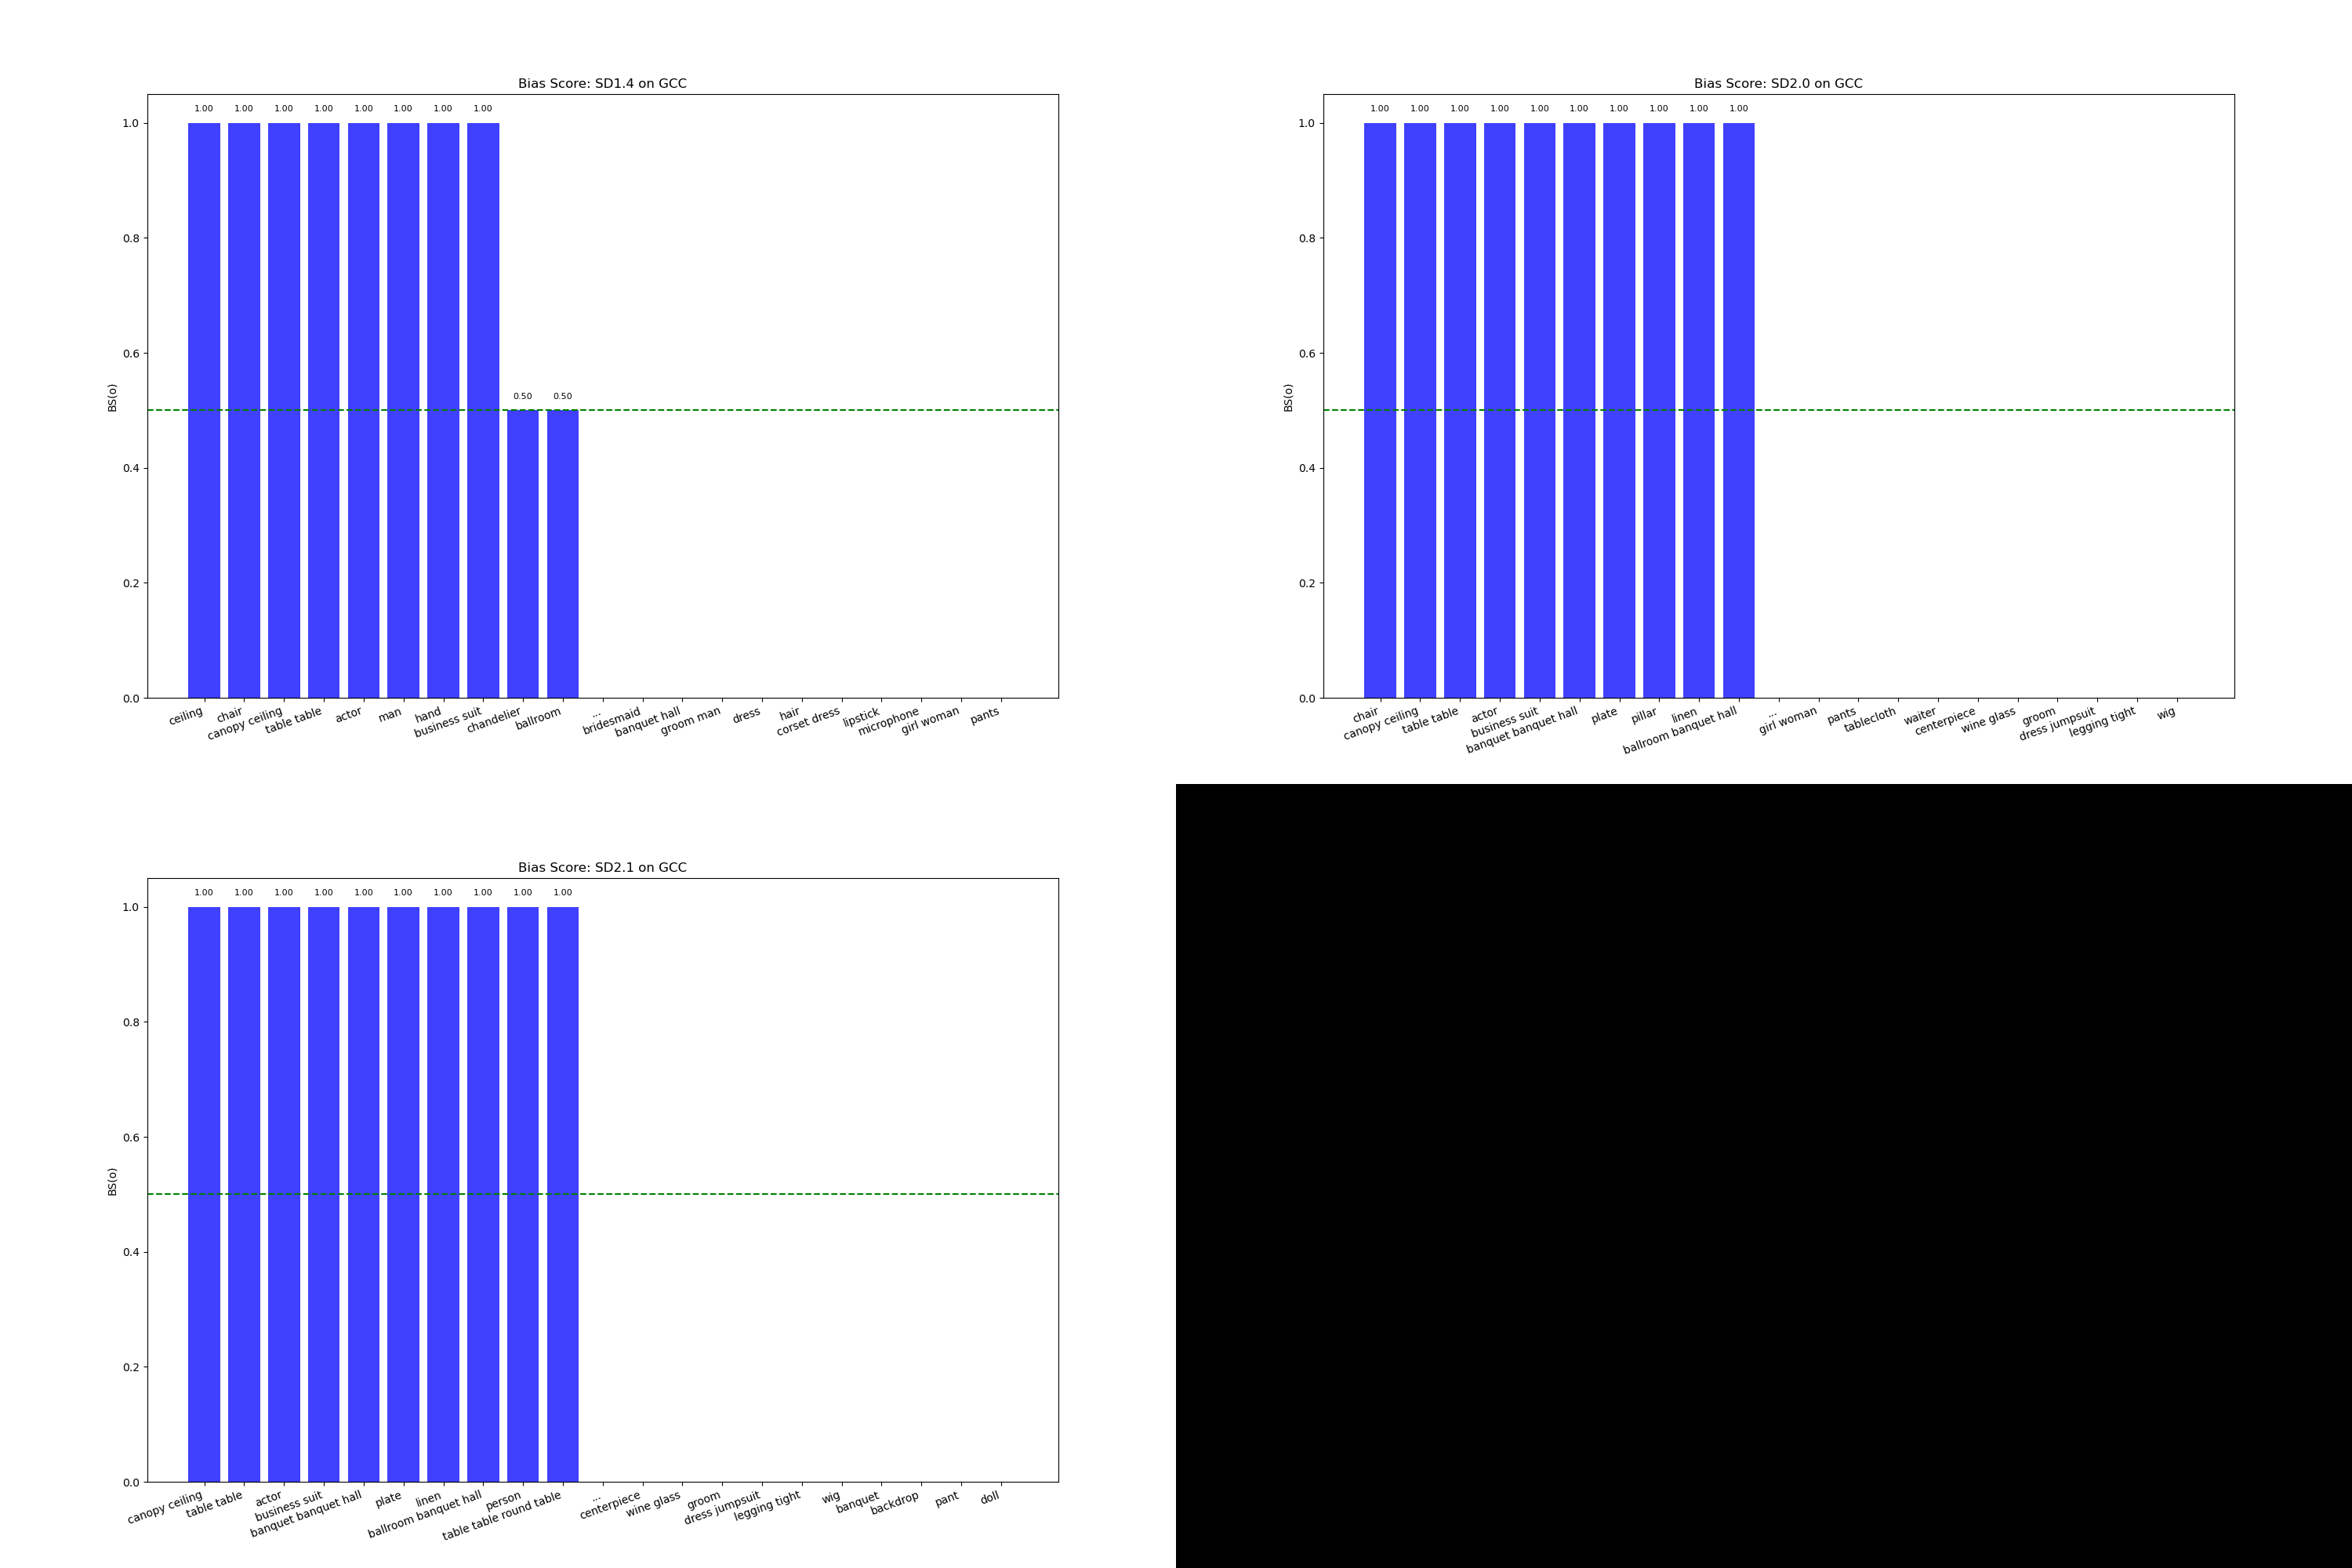

In [5]:
image1 = Image.open('stable_diffusion_analysis/output_data/SD1.4_GCC_bias_score.png')
image2 = Image.open('stable_diffusion_analysis/output_data/SD2.0_GCC_bias_score.png')
image3 = Image.open("stable_diffusion_analysis/output_data/SD2.1_GCC_bias_score.png")
#1500x1000
width1, height1 = image1.size
new_image = Image.new('RGB', (width1*2, height1*2))
new_image.paste(image1, (0, 0))
new_image.paste(image2, (width1, 0))
new_image.paste(image3, (0, height1))
display(new_image)

If a set of detected objects in feminine prompts and masculine prompts is statistically different, then it will be stored in "all_significant_objects_{DATASET_NAME}.json"
Adjust threshold in detect_objects.py to get more or less objects.


````python

if p_value < 0.05:
				significant_objects.append({
					"prompt_idx": prompt_idx,
					"femi_objects": femi_object,
					"masc_objects": masc_object,
					"chi_square": chi2,
					"p_value": p_value,
				})

````

In [6]:
data = json.load(open("all_significant_objects_GCC.json", "r"))
data

{'SD1.4': [[]], 'SD2.0': [[]], 'SD2.1': [[]]}

## Dependency Plot ##
This plot shows dependency of model on dataset. It is saved as "stable_diffusion_analysis/output_data/{MODEL_NAME}_{DATASET_NAME}_****.png".

**** needs to be replaced with type of dependency or bias_score

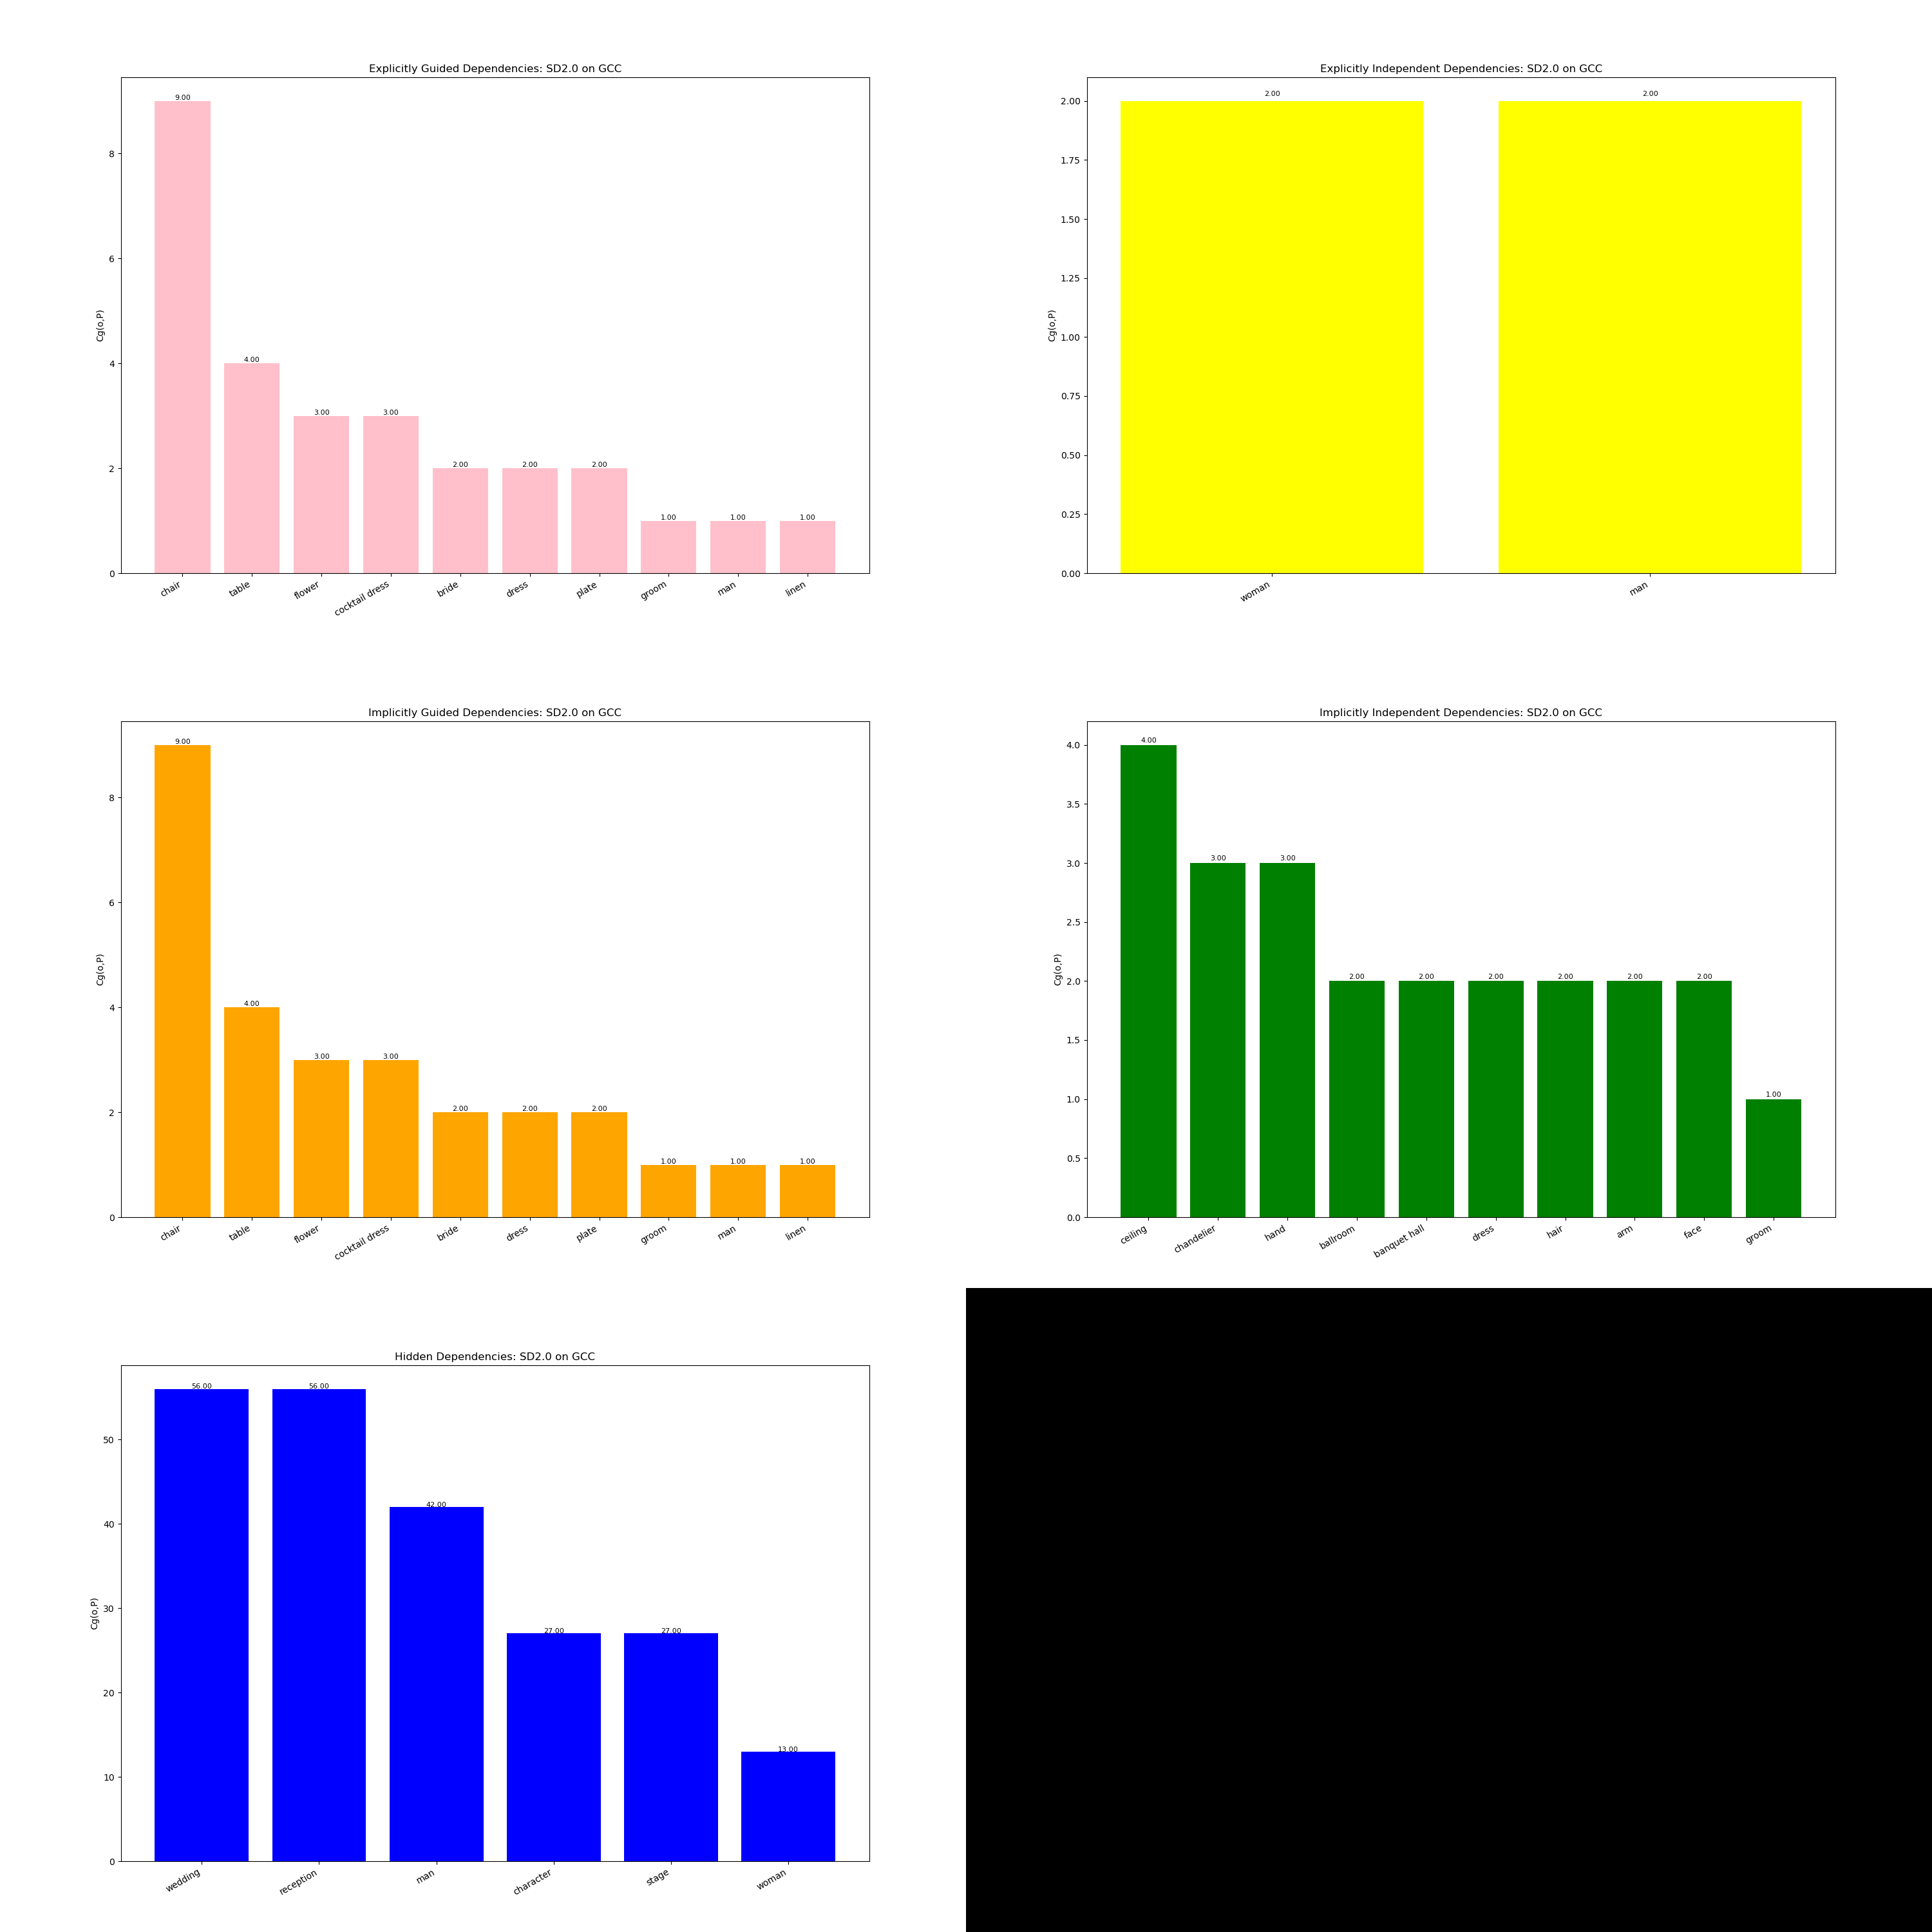

In [7]:
image1 = Image.open('stable_diffusion_analysis/output_data/SD2.0_GCC_explicit_guided.png')
image2 = Image.open('stable_diffusion_analysis/output_data/SD2.0_GCC_explicit_independent.png')
image3 = Image.open("stable_diffusion_analysis/output_data/SD2.0_GCC_implicit_guided.png")
image4 = Image.open("stable_diffusion_analysis/output_data/SD2.0_GCC_implicit_independent.png")
image5 = Image.open("stable_diffusion_analysis/output_data/SD2.0_GCC_hidden.png")
#1500x1000
width1, height1 = image1.size
new_image = Image.new('RGB', (width1*2, height1*3))
new_image.paste(image1, (0, 0))
new_image.paste(image2, (width1, 0))
new_image.paste(image3, (0, height1))
new_image.paste(image4, (width1, height1))
new_image.paste(image5, (0, height1*2))
display(new_image)

Here is bias score on dependedncy comparison between SD2.0 and SD2.1 on GCC dataset

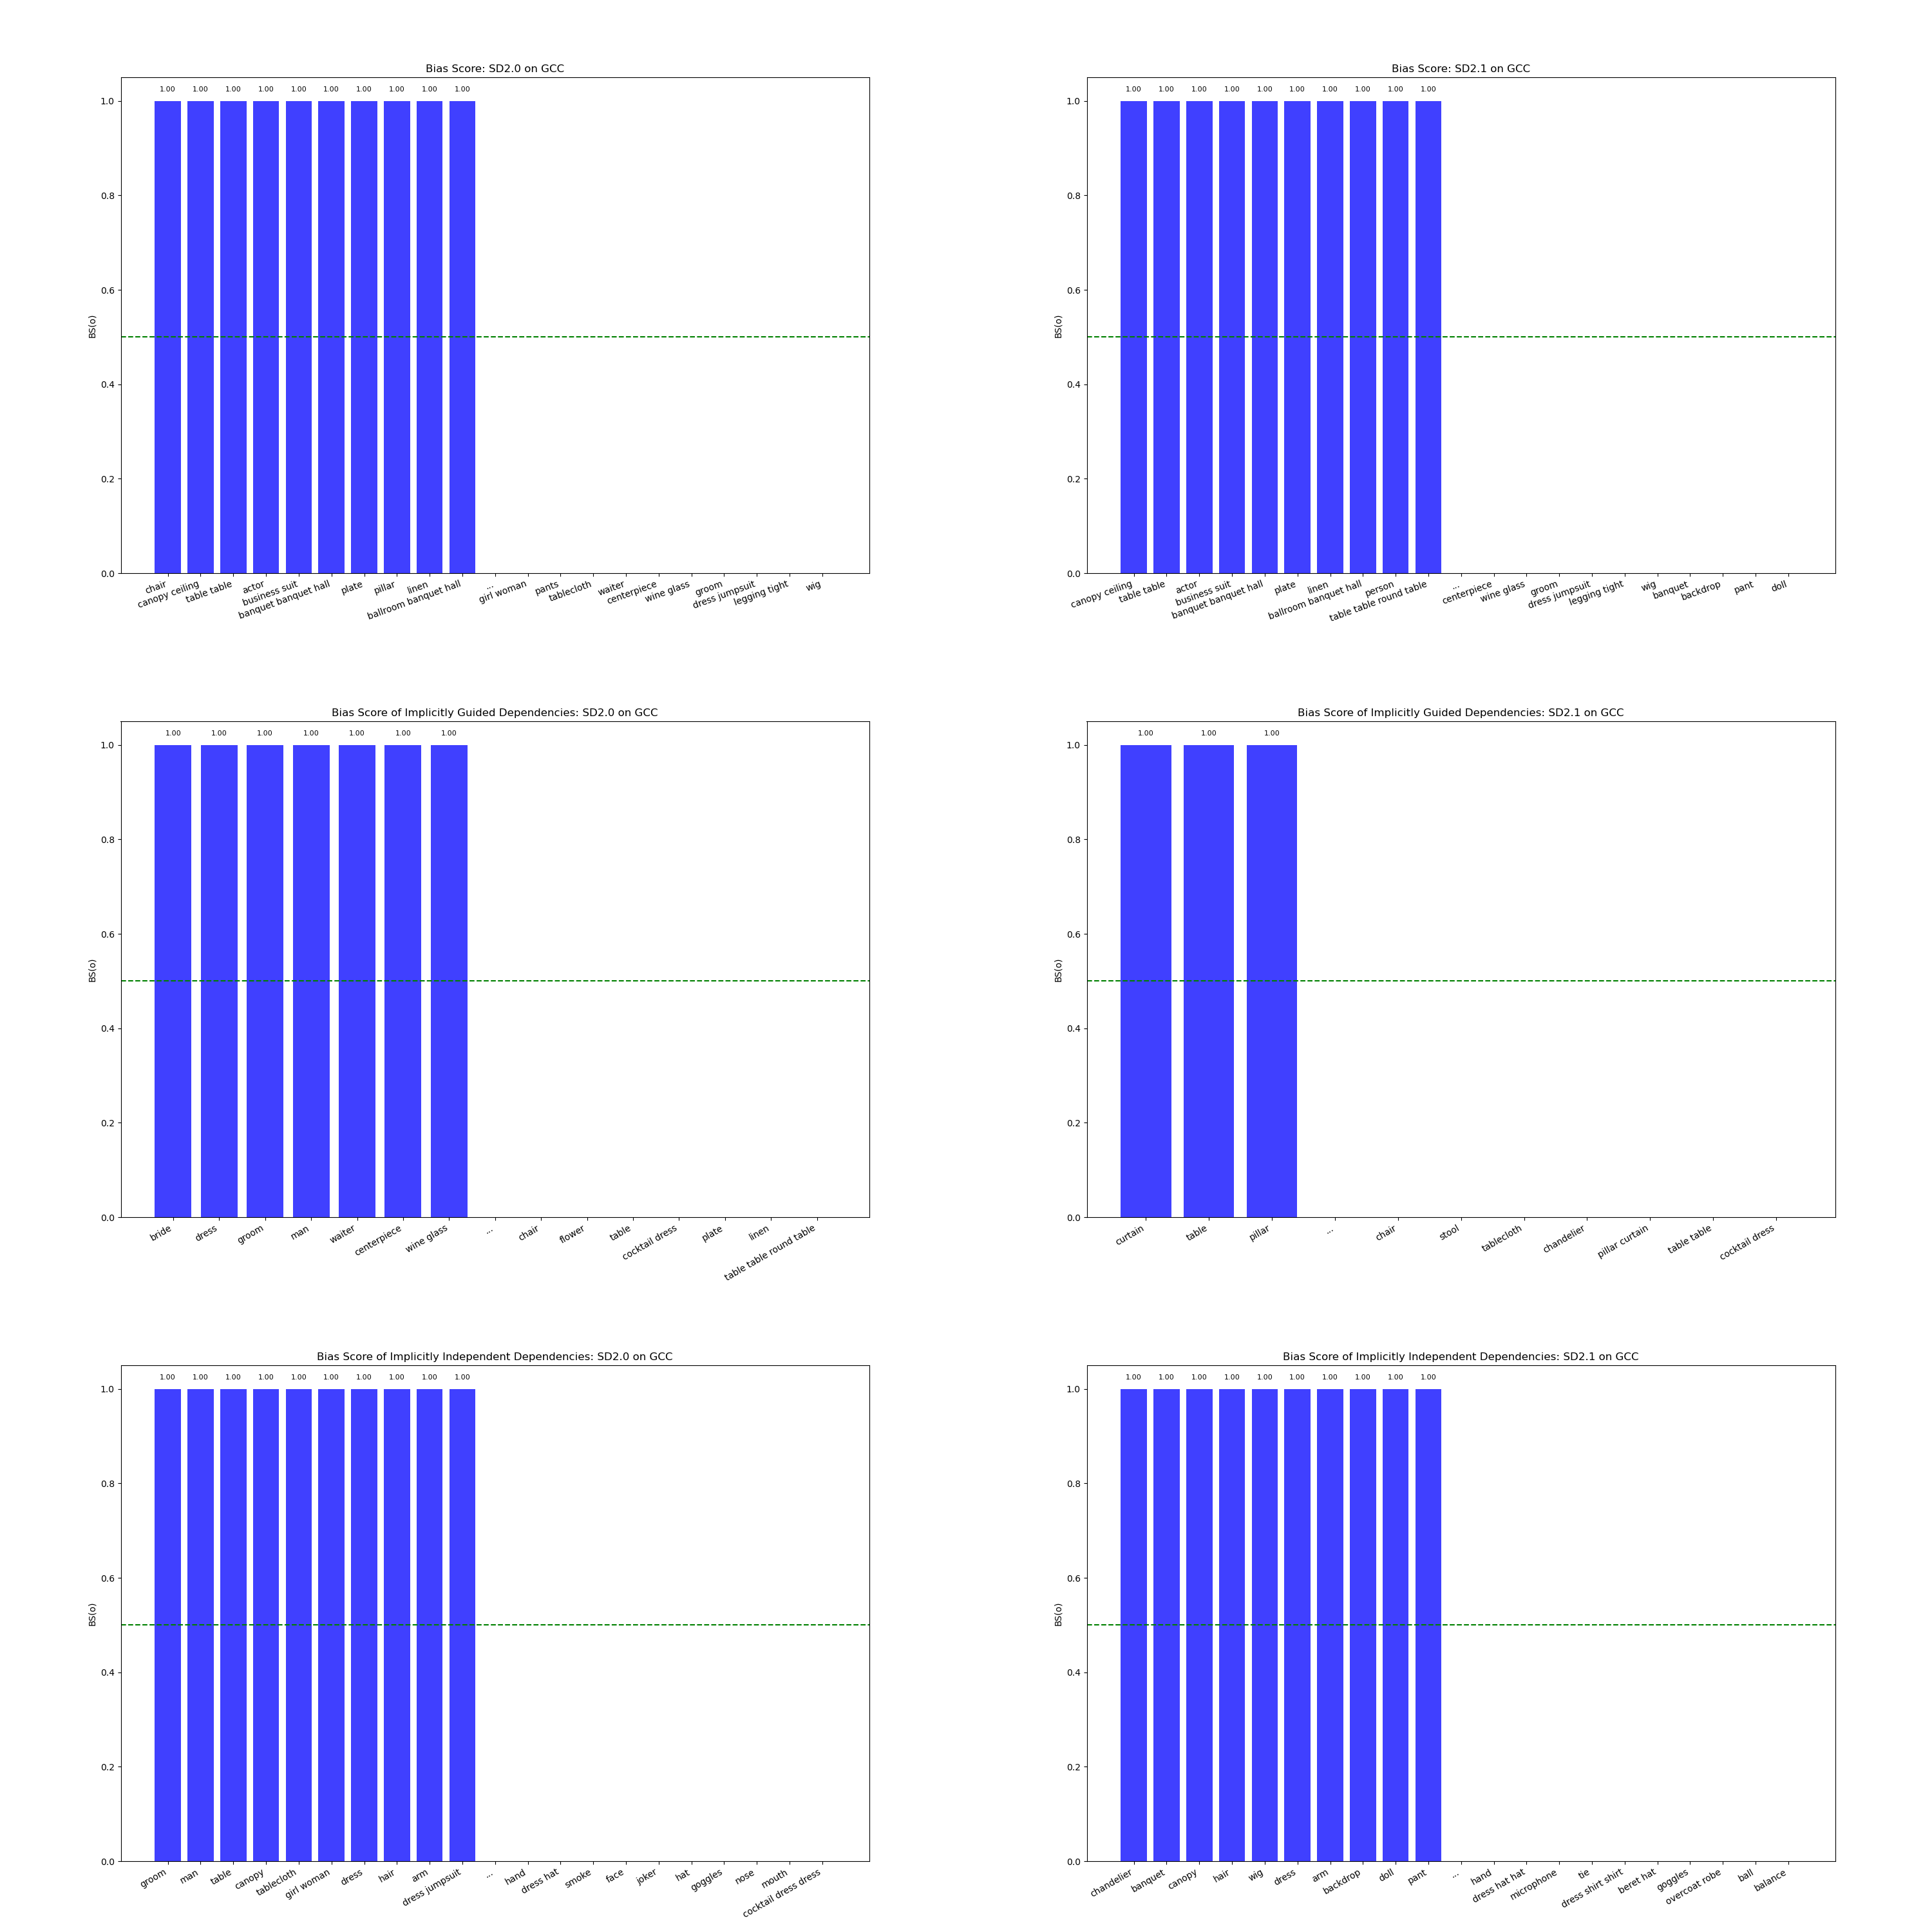

In [8]:
image1 = Image.open('stable_diffusion_analysis/output_data/SD2.0_GCC_bias_score.png')
image2 = Image.open('stable_diffusion_analysis/output_data/SD2.1_GCC_bias_score.png')
image3 = Image.open("stable_diffusion_analysis/output_data/SD2.0_GCC_implicit_guided_bias_score.png")
image4 = Image.open("stable_diffusion_analysis/output_data/SD2.1_GCC_implicit_guided_bias_score.png")
image5 = Image.open("stable_diffusion_analysis/output_data/SD2.0_GCC_implicit_independent_bias_score.png")
image6 = Image.open("stable_diffusion_analysis/output_data/SD2.1_GCC_implicit_independent_bias_score.png")
#1500x1000
width1, height1 = image1.size
new_image = Image.new('RGB', (width1*2, height1*3))
new_image.paste(image1, (0, 0))
new_image.paste(image2, (width1, 0))
new_image.paste(image3, (0, height1))
new_image.paste(image4, (width1, height1))
new_image.paste(image5, (0, height1*2))
new_image.paste(image6, (width1, height1*2))
display(new_image)

These plots are for Profession

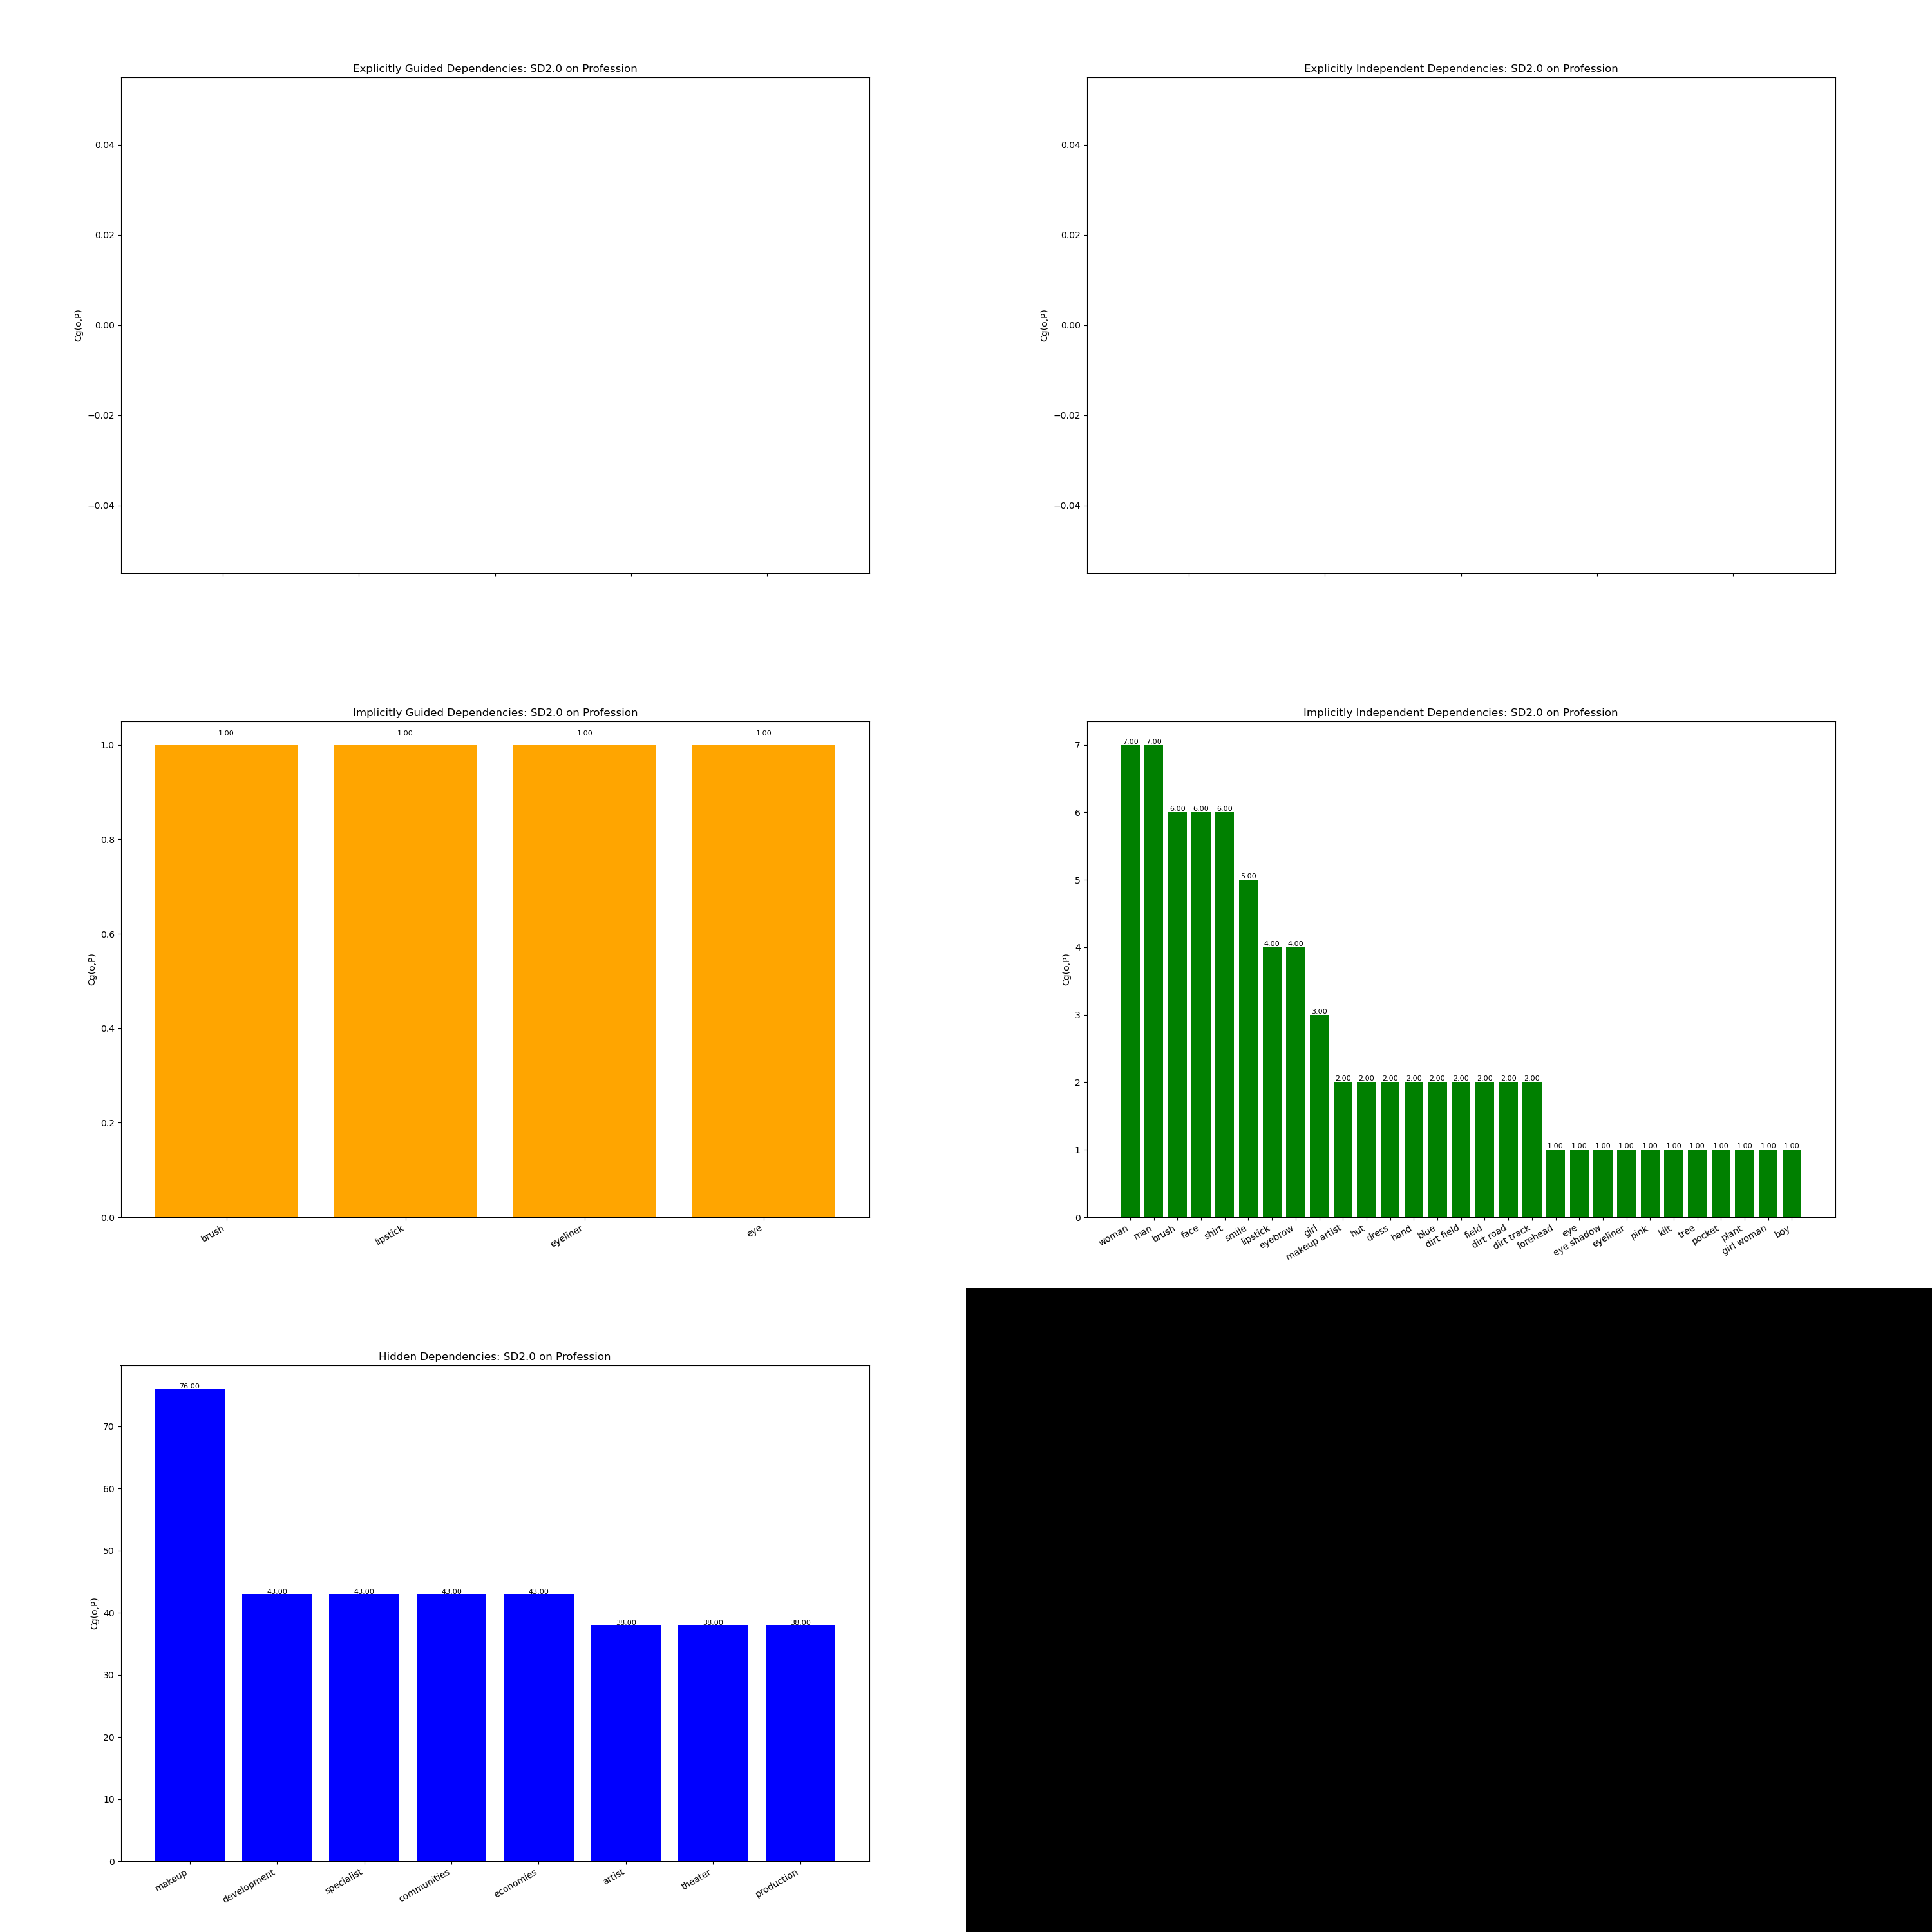

In [9]:
image1 = Image.open('stable_diffusion_analysis/output_data/SD2.0_Profession_explicit_guided.png')
image2 = Image.open('stable_diffusion_analysis/output_data/SD2.0_Profession_explicit_independent.png')
image3 = Image.open("stable_diffusion_analysis/output_data/SD2.0_Profession_implicit_guided.png")
image4 = Image.open("stable_diffusion_analysis/output_data/SD2.0_Profession_implicit_independent.png")
image5 = Image.open("stable_diffusion_analysis/output_data/SD2.0_Profession_hidden.png")
#1500x1000
width1, height1 = image1.size
new_image = Image.new('RGB', (width1*2, height1*3))
new_image.paste(image1, (0, 0))
new_image.paste(image2, (width1, 0))
new_image.paste(image3, (0, height1))
new_image.paste(image4, (width1, height1))
new_image.paste(image5, (0, height1*2))
display(new_image)

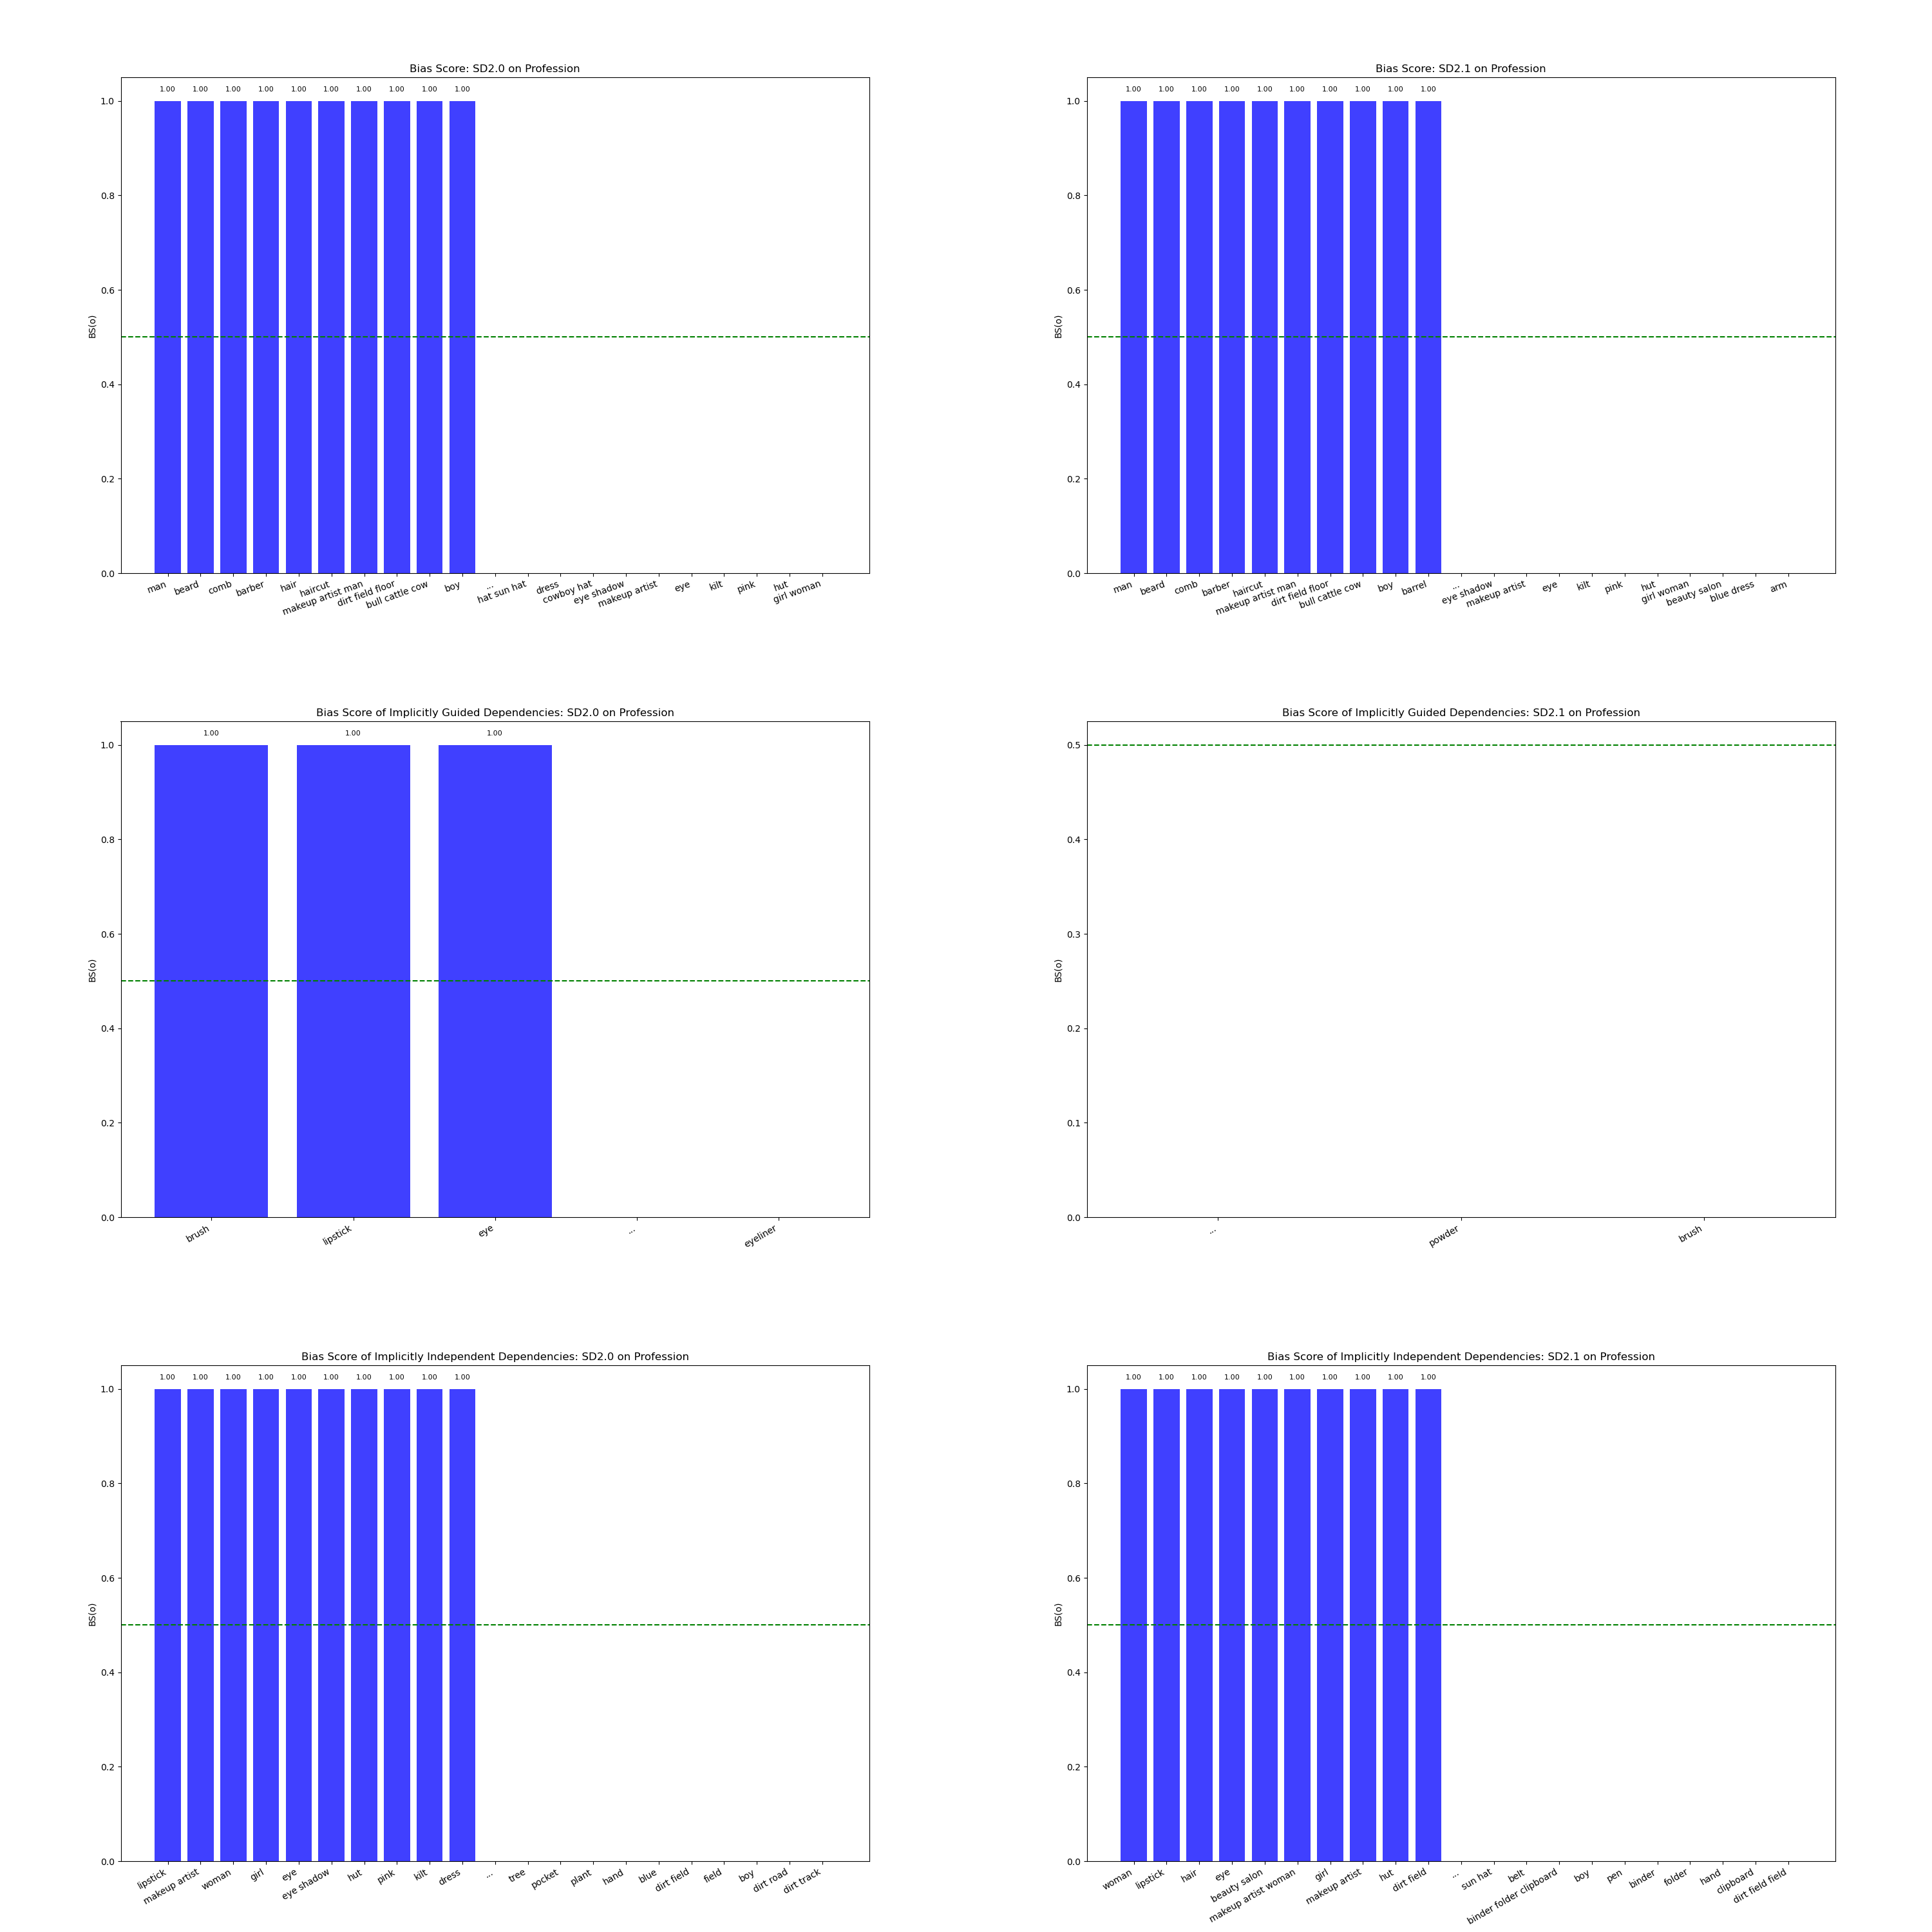

In [10]:
image1 = Image.open('stable_diffusion_analysis/output_data/SD2.0_Profession_bias_score.png')
image2 = Image.open('stable_diffusion_analysis/output_data/SD2.1_Profession_bias_score.png')
image3 = Image.open("stable_diffusion_analysis/output_data/SD2.0_Profession_implicit_guided_bias_score.png")
image4 = Image.open("stable_diffusion_analysis/output_data/SD2.1_Profession_implicit_guided_bias_score.png")
image5 = Image.open("stable_diffusion_analysis/output_data/SD2.0_Profession_implicit_independent_bias_score.png")
image6 = Image.open("stable_diffusion_analysis/output_data/SD2.1_Profession_implicit_independent_bias_score.png")
#1500x1000
width1, height1 = image1.size
new_image = Image.new('RGB', (width1*2, height1*3))
new_image.paste(image1, (0, 0))
new_image.paste(image2, (width1, 0))
new_image.paste(image3, (0, height1))
new_image.paste(image4, (width1, height1))
new_image.paste(image5, (0, height1*2))
new_image.paste(image6, (width1, height1*2))
display(new_image)